In [33]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import SVC

In [53]:
# irisDf = pd.read_csv("/content/drive/MyDrive/#2-M.Sc Computer Science [SXC]/1st Year/Books and notes/Sem 4/Machine Learning/SM+SS/27-02-23/iris.data")
irisDf = sns.load_dataset("iris")
irisDf.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Text(0.5, 1.0, 'Correlation On iris Classes')

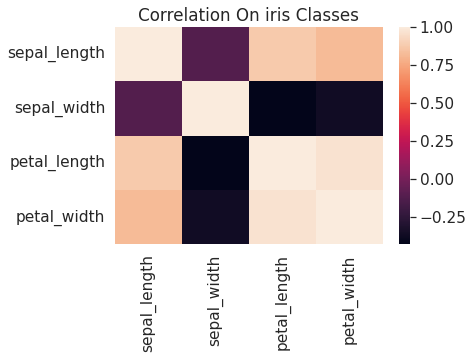

In [54]:
sns.heatmap(irisDf.corr())
plt.title('Correlation On iris Classes')

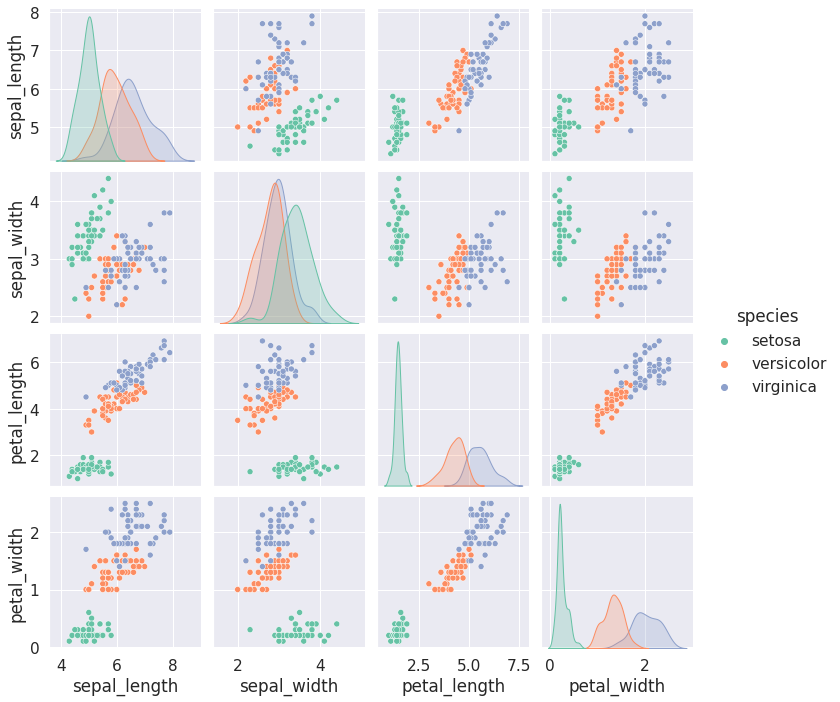

In [55]:
sns.pairplot(data=irisDf, hue='species', palette='Set2')

In [56]:
from sklearn.model_selection import train_test_split

In [57]:
x=irisDf.iloc[:,:-1]
y=irisDf.iloc[:,4]

In [58]:
x_train,x_test, y_train, y_test=train_test_split(x,y,test_size=0.30)

In [59]:
model = SVC(kernel="linear")
model.fit(x_train, y_train)

SVC(kernel='linear')

In [60]:
pred=model.predict(x_test)

In [67]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [62]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        17
  versicolor       1.00      0.92      0.96        12
   virginica       0.94      1.00      0.97        16

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.98        45
weighted avg       0.98      0.98      0.98        45



In [71]:
"{0:.2f}%".format(accuracy_score(y_test, pred) * 100)

'97.78%'

In [63]:
cm = confusion_matrix(y_test, pred)
cm

array([[17,  0,  0],
       [ 0, 11,  1],
       [ 0,  0, 16]])

In [64]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = model, X = x_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 97.00 %
Standard Deviation: 6.40 %


In [65]:
classes = irisDf['species'].unique()

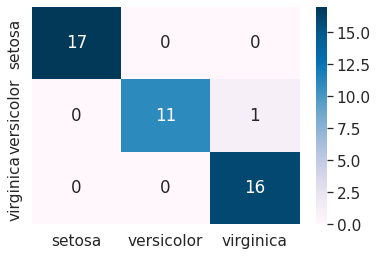

In [66]:
df_cm = pd.DataFrame(cm, classes, classes)
sns.heatmap(df_cm, annot=True, cmap="PuBu")
plt.show()